## Predicting Patient 10 Year Risk of Coronary Heart Disease (CHD)

The primary objective of this project is to develop a predictive model to assess the 10-year risk of coronary heart disease (CHD) in individuals based on a combination of demographic, behavioral, and medical factors. The dataset comprises various patient attributes, including demographic details (age, sex), behavioral habits (smoking status, daily cigarette consumption), and medical history/current conditions (blood pressure, cholesterol, BMI, glucose levels, and prevalence of chronic conditions such as hypertension and diabetes).

Using logistic regression, the analysis aims to:

1. __Identify Key Risk Factors:__ Quantify the impact of different features (e.g., age, smoking, systolic blood pressure) on the likelihood of developing CHD.
2. __Predict Risk:__ Accurately classify individuals as high-risk or low-risk for CHD over a 10-year horizon.
3. __Provide Insights for Preventive Healthcare:__ Offer actionable insights that can assist healthcare providers and policymakers in targeting interventions and managing CHD risk in populations.

This project involves cleaning and exploring the dataset, selecting relevant features, fitting a logistic regression model, and evaluating its performance using appropriate metrics such as accuracy, precision, recall, and AUC-ROC. By the end of the analysis, the model will serve as a tool to aid in early identification of individuals at risk for CHD, potentially reducing the burden of heart disease through timely prevention and management.

### About the Dataset

The dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea/data?select=train.csv) and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.  The data contains 3390 records and the following features

1. **Sex:** male or female("M" or "F")
2. **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
4. **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
5. **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
6. **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
7. **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
8. **Diabetes:** whether or not the patient had diabetes (Nominal)
9. **Tot Chol:** total cholesterol level (Continuous)
10. **Sys BP:** systolic blood pressure (Continuous)
11. **Dia BP:** diastolic blood pressure (Continuous)
12. **BMI:** Body Mass Index (Continuous)
13. **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
14. **Glucose:** glucose level (Continuous)
15. **10 year risk of coronary heart disease CHD** (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("train.csv", index_col=[0])
df = data.copy()

In [3]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.shape

(3390, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [6]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Data Cleaning

Drop the education column as there is no information describing what the value 1-4 represents

In [7]:
df = df.drop(columns=["education"])

> 1. Check for duplicate data

In [8]:
df[df.duplicated()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,


> 2. Check for missing values

In [9]:
df.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

> 3. Handle missing values using imputation. <br>
Fill with the median for continuous features and fill with mode for nominal features.

In [10]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [11]:
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Exploratory Data Analysis

#### 1. Univariate Analysis

**Age Distribution**

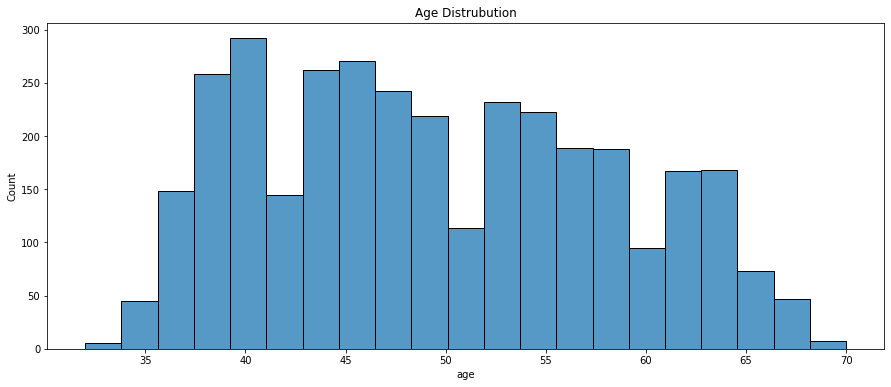

In [12]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='age')
plt.title('Age Distrubution')
plt.show()

Age range spans between 32-70 years which are majorly middle aged people

**Sex Distribution**

In [13]:
df['sex'].value_counts(normalize=True)

F    0.567257
M    0.432743
Name: sex, dtype: float64

Dataset contain 57% female patients and 43% male patients.

**Smoking Distribution**

In [14]:
df['is_smoking'].value_counts(normalize=True)

NO     0.50236
YES    0.49764
Name: is_smoking, dtype: float64

Percentage of smokers and non-smokers are very similar

**Cigars Per Day**

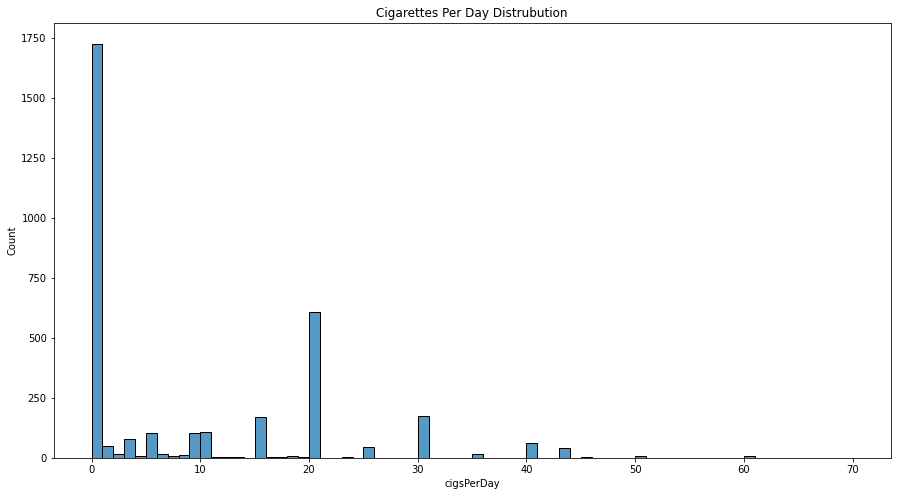

In [15]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='cigsPerDay', binwidth=1)
plt.title('Cigarettes Per Day Distrubution')
plt.show()

People smoking 0 cigars per day were the highest

**Blood Pressure Medications**

In [16]:
df['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

Dataset has more patients who are not taking BP medicatons

**Prevalent Stroke**

In [17]:
df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

Dataset has more patients without existing stroke conditions

**Prevalent Hypertension**

In [18]:
df['prevalentHyp'].value_counts(normalize=True)

0    0.684661
1    0.315339
Name: prevalentHyp, dtype: float64

Dataset has more patients who are not hypertensive

**Diabetes**

In [19]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

Majority of the patients are non-diabetic

**Total Cholesterol Level**

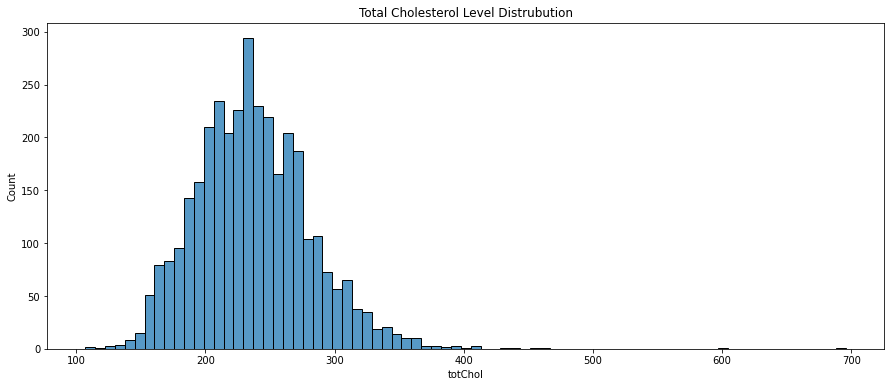

In [20]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='totChol')
plt.title('Total Cholesterol Level Distrubution')
plt.show()

**Systolic Blood Pressure**

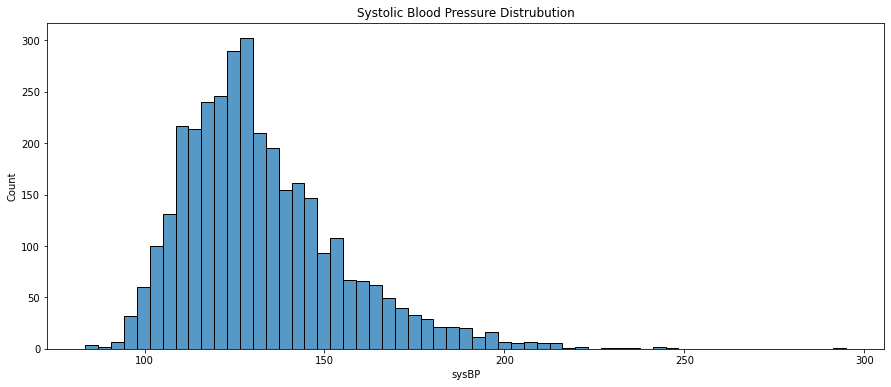

In [21]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='sysBP')
plt.title('Systolic Blood Pressure Distrubution')
plt.show()

**Diastolic Blood Pressure**

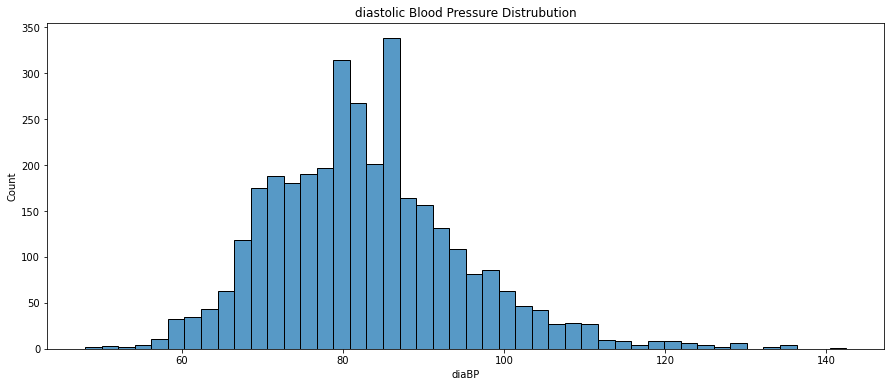

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='diaBP')
plt.title('diastolic Blood Pressure Distrubution')
plt.show()

**BMI**

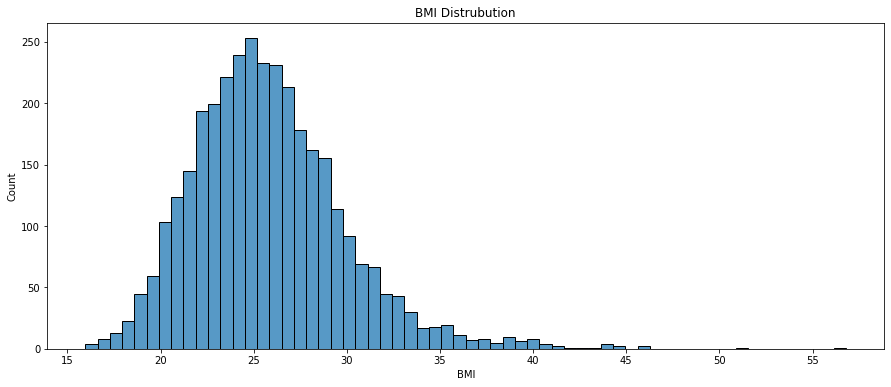

In [23]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='BMI')
plt.title('BMI Distrubution')
plt.show()

**Heart Rate**

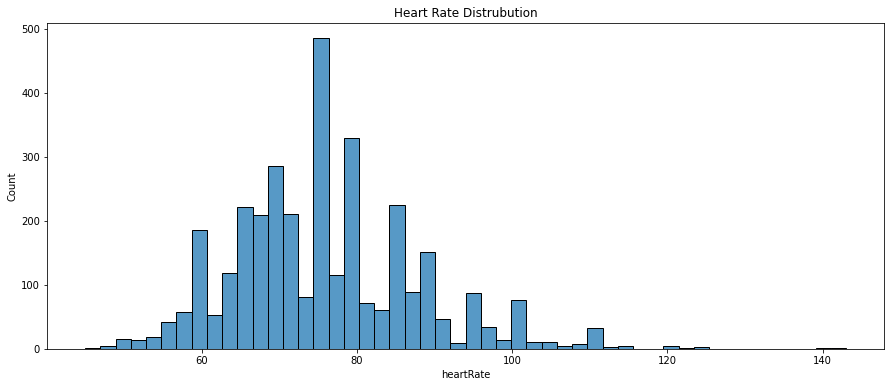

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='heartRate')
plt.title('Heart Rate Distrubution')
plt.show()

**Glucose**

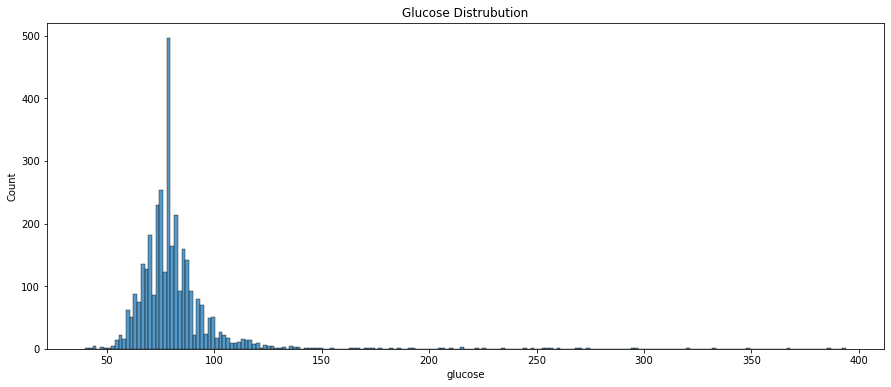

In [25]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='glucose')
plt.title('Glucose Distrubution')
plt.show()

Total cholesterol, Systolic BP, Diastolic BP, BMI, Heart Rate and Glucose level all follow a normal distribution curve

**10-Year Coronary Heart Disease**

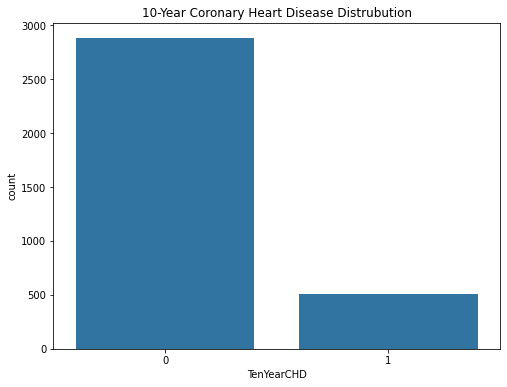

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='TenYearCHD')
plt.title('10-Year Coronary Heart Disease Distrubution')
plt.show()

The data has is imbalanced and has more patients without a 10-year risk of CHD

#### 2. Bivariate Analysis

**Age Distribution by Ten-Year CHD Risk**

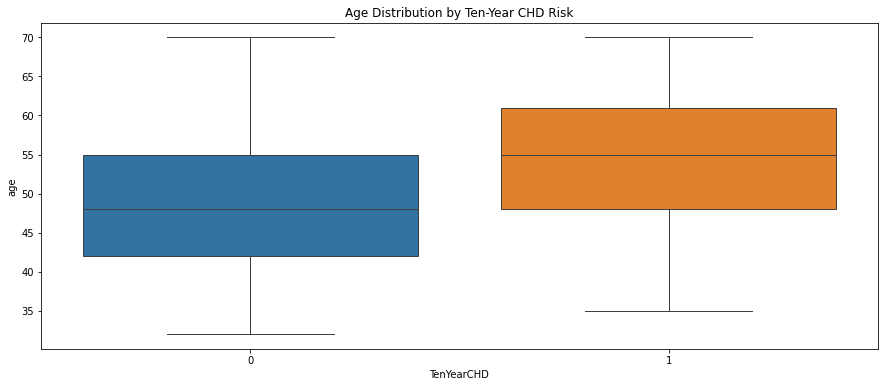

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='age', hue='TenYearCHD', legend=False)
plt.title('Age Distribution by Ten-Year CHD Risk')
plt.show()

**Sex Distribution by Ten-Year CHD Risk**

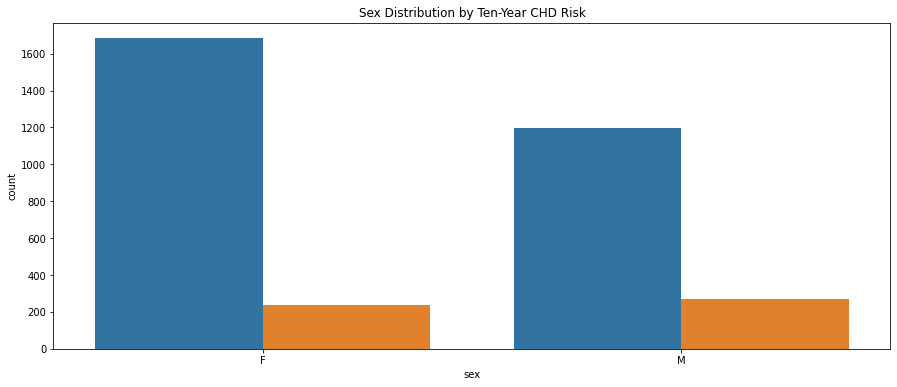

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='sex', hue='TenYearCHD', legend=False)
plt.title('Sex Distribution by Ten-Year CHD Risk')
plt.show()

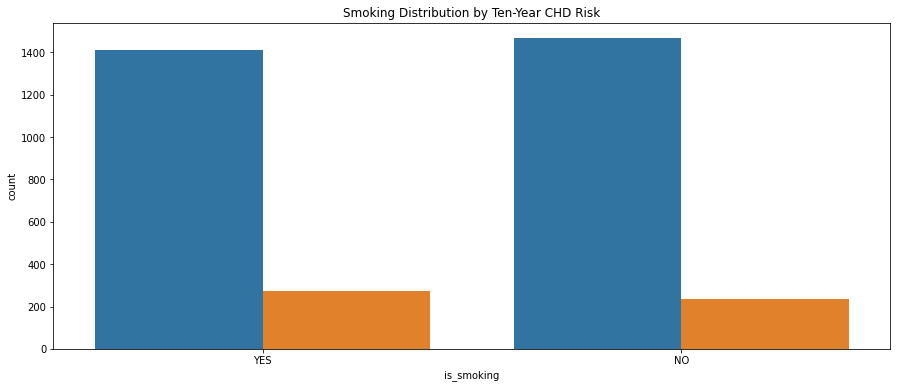

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='is_smoking', hue='TenYearCHD', legend=False)
plt.title('Smoking Distribution by Ten-Year CHD Risk')
plt.show()

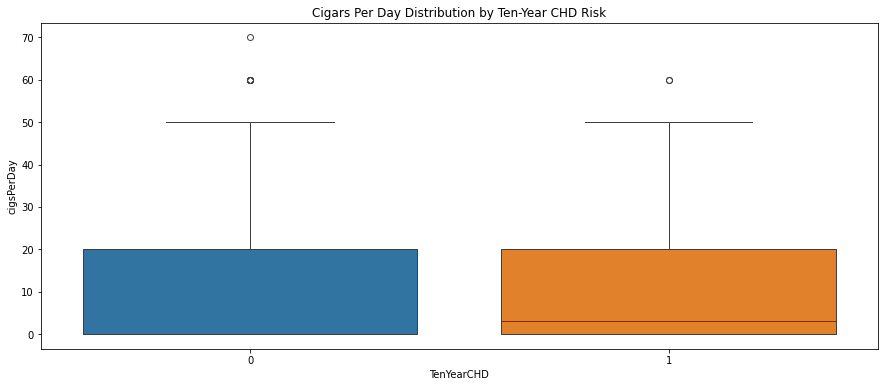

In [30]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='cigsPerDay', hue='TenYearCHD', legend=False)
plt.title('Cigars Per Day Distribution by Ten-Year CHD Risk')
plt.show()

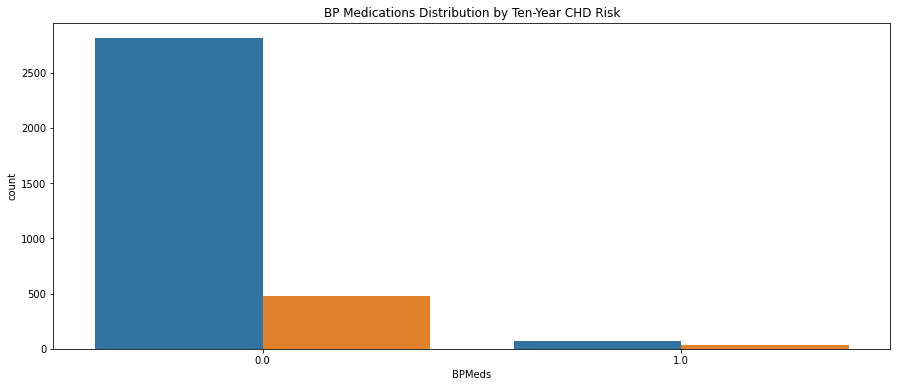

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='BPMeds', hue='TenYearCHD', legend=False)
plt.title('BP Medications Distribution by Ten-Year CHD Risk')
plt.show()

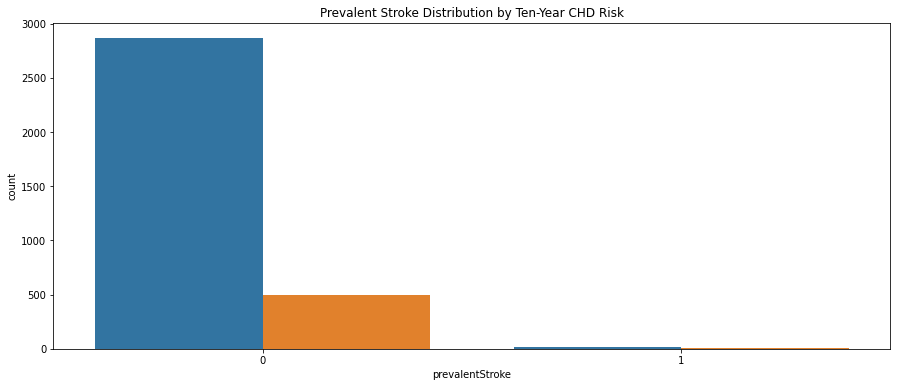

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD', legend=False)
plt.title('Prevalent Stroke Distribution by Ten-Year CHD Risk')
plt.show()

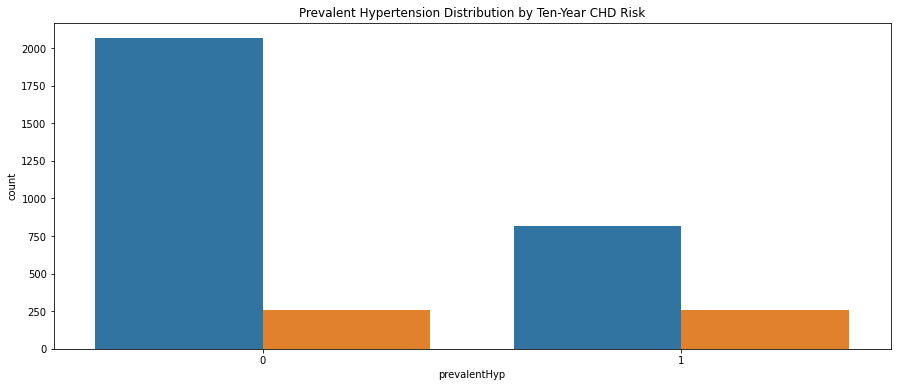

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD', legend=False)
plt.title('Prevalent Hypertension Distribution by Ten-Year CHD Risk')
plt.show()

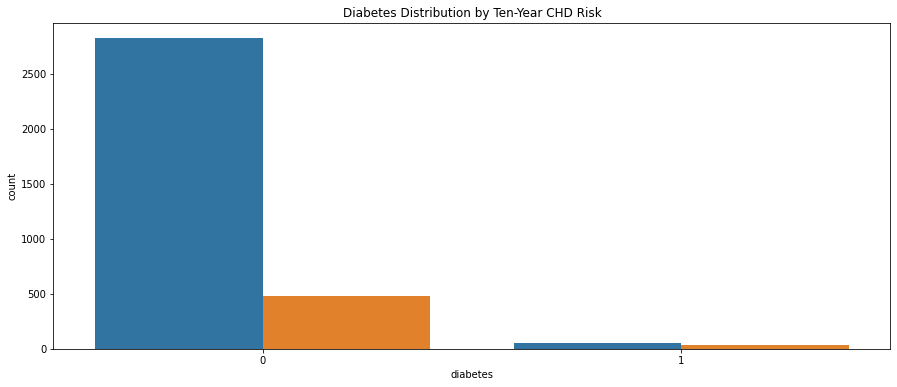

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='diabetes', hue='TenYearCHD', legend=False)
plt.title('Diabetes Distribution by Ten-Year CHD Risk')
plt.show()

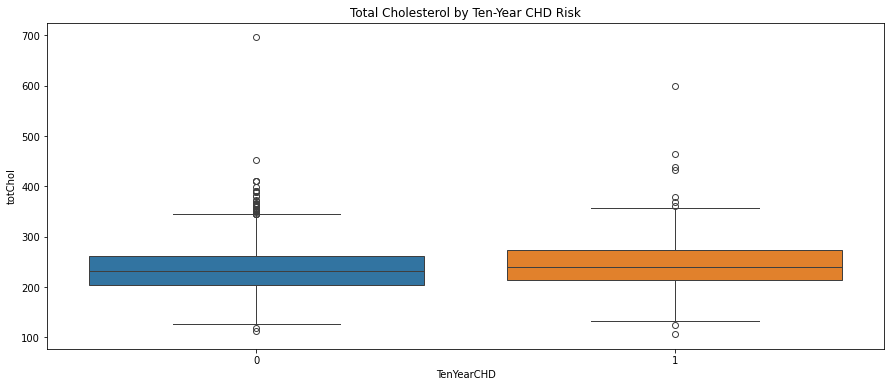

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='totChol', hue='TenYearCHD', legend=False)
plt.title('Total Cholesterol by Ten-Year CHD Risk')
plt.show()

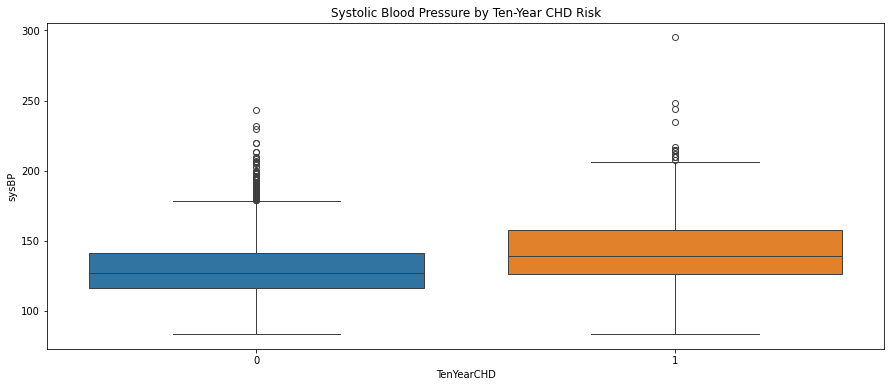

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='sysBP', hue='TenYearCHD', legend=False)
plt.title('Systolic Blood Pressure by Ten-Year CHD Risk')
plt.show()

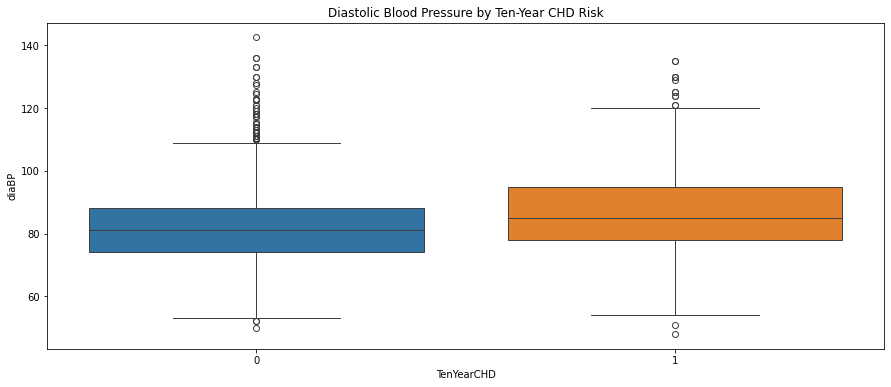

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='diaBP', hue='TenYearCHD', legend=False)
plt.title('Diastolic Blood Pressure by Ten-Year CHD Risk')
plt.show()

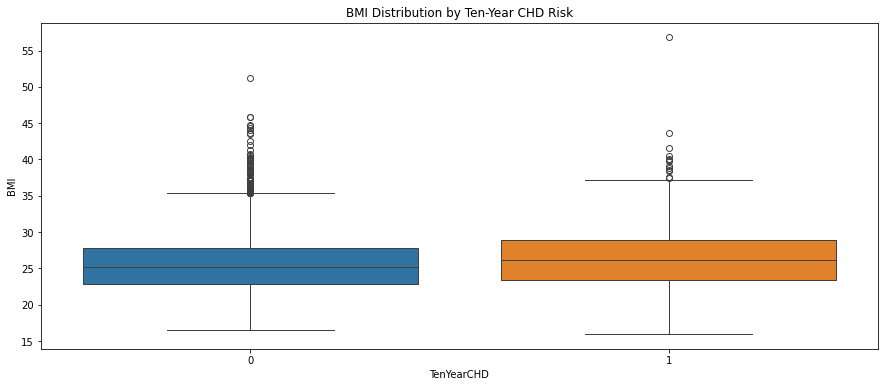

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='BMI', hue='TenYearCHD', legend=False)
plt.title('BMI Distribution by Ten-Year CHD Risk')
plt.show()

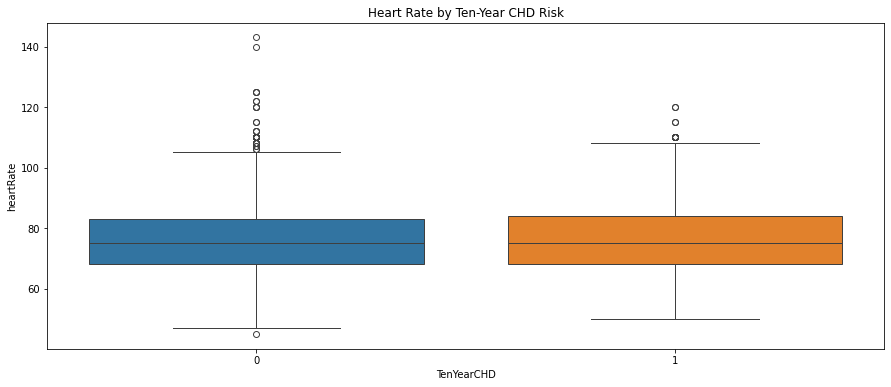

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='heartRate', hue='TenYearCHD', legend=False)
plt.title('Heart Rate by Ten-Year CHD Risk')
plt.show()

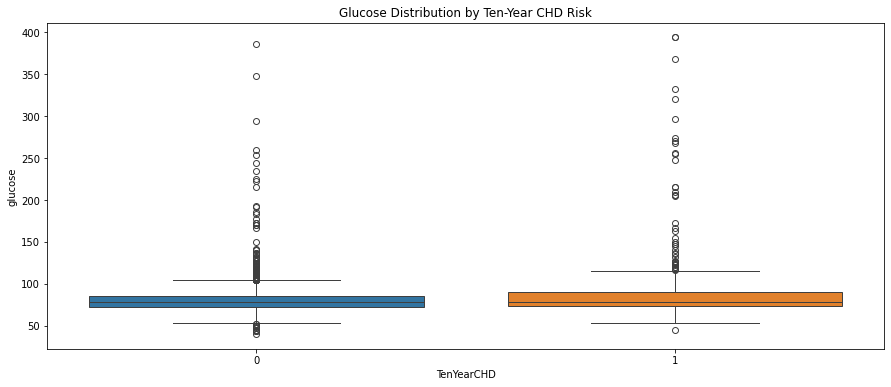

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='TenYearCHD', y='glucose', hue='TenYearCHD', legend=False)
plt.title('Glucose Distribution by Ten-Year CHD Risk')
plt.show()

Interpretation:
- Older age is associated with higher CHD risk.
- Higher smoking frequency is associated with increased CHD risk.
- BP Medications, prevalent Hypertension and diabetes show higher means in patients with positive CHD risk.
- Higher Cholesterol and blood pressure levels are associated with increased CHD risk.
- BMI is slightly higher for patients with positive CHD risk but not significantly different.
- Glucose levels are higher for patients with positive CHD risk.

### Correlation Analysis

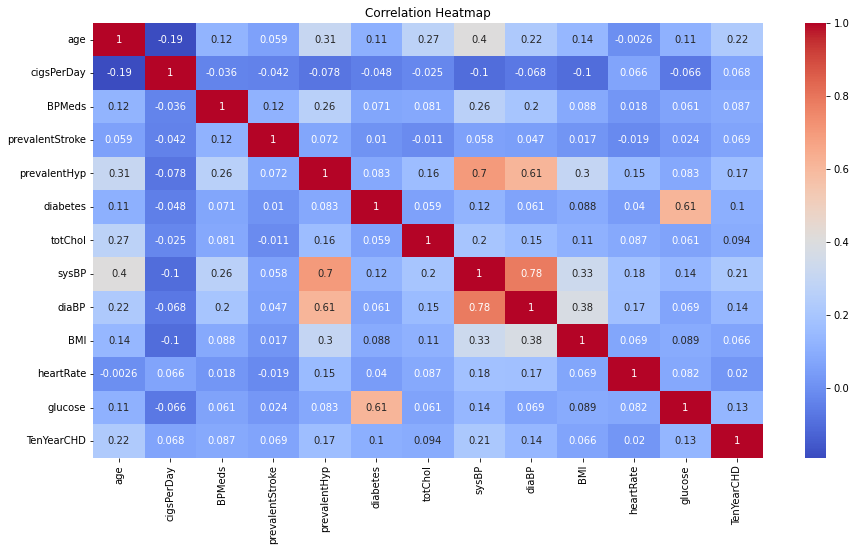

In [41]:
correlation = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Variables such as age, systolic blood pressure (sysBP), and prevalent hypertension exhibit the strongest correlations with CHD risk, highlighting their potential as key influencing factors. While other variables, like cholesterol and glucose, are statistically significant, their weaker correlations suggest a more limited impact on CHD risk. In contrast, heart rate shows no significant correlation, indicating it likely has minimal or no effect.

### Classification Using Machine Learning 

1. Primary Metric
    - Recall(Sensitivity): Missing a high-risk individual could have severe consequences, so prioritizing recall ensures that most CHD cases are identified.
2. Secondary Metric
    - Precision and F1 Score to ensure the model isn’t over-diagnosing excessively.
    - ROC-AUC to assess the model’s overall performance and choose the optimal threshold.

> 1. Encode categorical features 

In [42]:
categorical_features = ['sex', 'is_smoking']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

> 2. Separate data: y is our target/dependent variable and X are the independent features

In [43]:
X = df_encoded.drop(columns=['TenYearCHD'])  
y = df_encoded['TenYearCHD'] 

> 3. Standardize continuous variables

In [44]:
scaler = StandardScaler()
continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X[continuous_features] = scaler.fit_transform(X[continuous_features])

> 4. Split data to training and testing sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

> 5. Baseline Logistic Regression Model

In [46]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

y_test_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_train_pred_prob = log_reg.predict_proba(X_train)[:,1]

report_test = classification_report(y_test, y_test_pred)
report_train = classification_report(y_train, y_train_pred)

print(f" Taining Performance \n {report_train} \n")
print(f" Testing Performance \n {report_test}")

 Taining Performance 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2015
           1       0.75      0.09      0.16       358

    accuracy                           0.86      2373
   macro avg       0.81      0.54      0.54      2373
weighted avg       0.84      0.86      0.81      2373
 

 Testing Performance 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       864
           1       0.89      0.05      0.10       153

    accuracy                           0.86      1017
   macro avg       0.87      0.53      0.51      1017
weighted avg       0.86      0.86      0.80      1017



> 6. Handle data imbalance with SMOTE

In [47]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

> 7. Use GridsearchCV to find the best parameters

In [48]:
params = param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
clf = GridSearchCV(estimator=log_reg, param_grid=params, scoring='recall', cv=10, error_score='raise')

clf.fit(X_train_sm, y_train_sm)

best_values = clf.best_params_
print(best_values)

{'C': 0.01, 'penalty': 'l2'}


> 8. Retain the Model

In [52]:
log_reg_sm = LogisticRegression(random_state=42, C=best_values['C'], penalty=best_values['penalty'])
log_reg_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = log_reg_sm.predict(X_test)
y_pred_prob_sm = log_reg_sm.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_sm)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")

y_pred_optimal = (y_pred_prob_sm >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_sm)
precision = precision_score(y_test, y_pred_sm)
recall = recall_score(y_test, y_pred_sm)
f1 = f1_score(y_test, y_pred_sm)
roc_auc = roc_auc_score(y_test, y_pred_optimal)
report = classification_report(y_test, y_pred_sm)

Optimal Threshold: 0.45


> 9. Evaluate Models Performance

In [53]:
print(f"Accuracy: {accuracy:.2f} \n")
print(f"Precision: {precision:.2f} \n")
print(f"Recall: {recall:.2f} \n")
print(f"F1 Score: {f1:.2f} \n")
print(f"ROC-AUC Score: {roc_auc:.2f} \n")
print(report)

Accuracy: 0.68 

Precision: 0.26 

Recall: 0.63 

F1 Score: 0.37 

ROC-AUC Score: 0.68 

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       864
           1       0.26      0.63      0.37       153

    accuracy                           0.68      1017
   macro avg       0.59      0.66      0.57      1017
weighted avg       0.81      0.68      0.72      1017



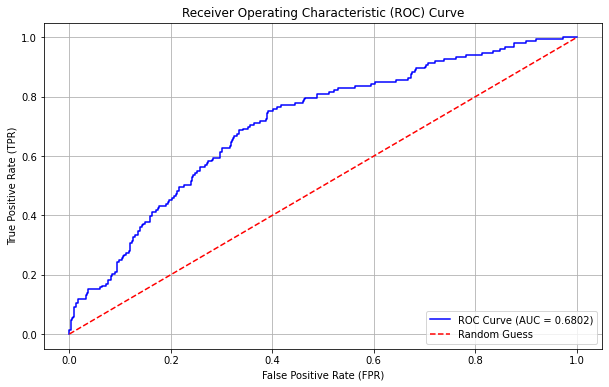

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Interpretation of the model

- **Accuracy:** The model correctly predicts whether a patient has a ten-year risk of CHD for **68% of the samples overall**. However, accuracy alone can be misleading in datasets where patients without CHD risk (the majority) dominate predictions.

- **Precision:** Among all the patients the model predicts to have a ten-year risk of CHD, only **26% actually have the condition**. This low precision suggests the model produces a significant number of false positives, incorrectly identifying patients without CHD risk as being at risk.

- **Recall:** The model successfully identifies **63% of patients who truly have a ten-year risk of CHD**. While this is relatively good, it comes at the cost of misclassifying many patients without CHD risk as being at risk.

- **F1 Score:** The F1 score, which balances precision and recall, is **0.37**. This indicates the model struggles to effectively and consistently identify patients with CHD risk.

- **ROC AUC Score:** The model's ability to distinguish between patients with and without a ten-year risk of CHD is **moderate**, with a score of **0.68**. This is better than random guessing (AUC = 0.5) but significantly lower than the ideal (AUC = 1.0), indicating room for improvement in predictive power.


### Recommendations

- **Explore Alternative Models:** Explore more sophisticated models like Random Forest, Gradient Boosting (e.g., XGBoost, LightGBM), or Support Vector Machines (SVM). These models are better equipped to handle complex, non-linear relationships in the data, which could enhance the predictive performance for CHD risk. Additionally, ensemble methods like Gradient Boosting can provide robust feature importance insights.

- **Feature Engineering:** Investigate advanced feature engineering techniques to enrich the dataset. For example:

    - Create interaction terms, such as age × cigsPerDay or BMI × prevalentHyp, to capture synergistic effects.
    - Categorize continuous variables into meaningful bins (e.g., age groups or cholesterol levels) to simplify complex patterns.
    - Explore domain-specific features, guided by medical knowledge, to better represent CHD risk factors.